In [59]:
import collections
import glob
import itertools
import json
import matplotlib
rc_fonts = {
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

In [60]:
import s3dexp.db as db

In [61]:
# Plot decode time and total time of individual files
df = pd.read_sql(
    "select decode_ms - read_ms as true_decode_ms, total_ms - read_ms as total_compute_ms from AppExp \
        where expname=%s and device=%s order by total_compute_ms",
    db.engine,
    params=['mobilenet_inference', 'gpu'])

In [62]:
print df.count()

true_decode_ms      2515
total_compute_ms    2515
dtype: int64


In [63]:
decode_percent = df['true_decode_ms'] / df['total_compute_ms']

true_decode_ms      2515
total_compute_ms    2515
dtype: int64


<IPython.core.display.Javascript object>


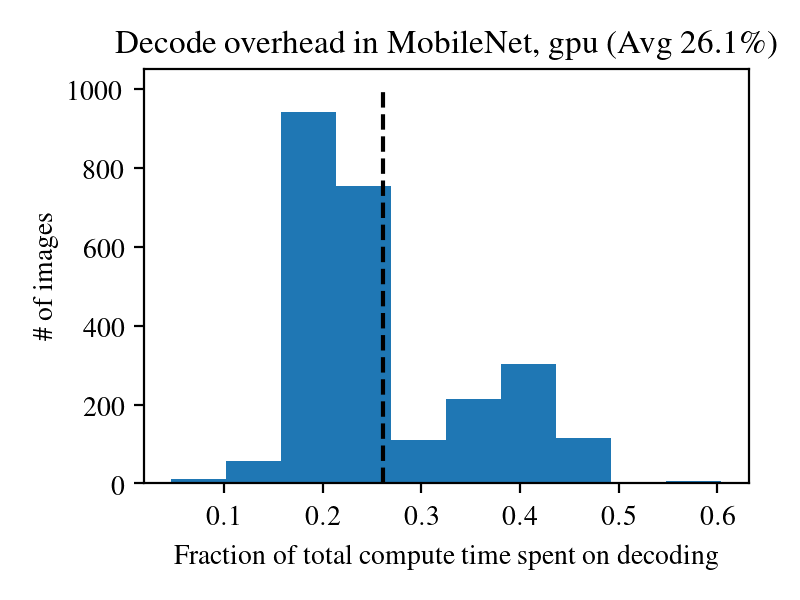

true_decode_ms      2515
total_compute_ms    2515
dtype: int64


<IPython.core.display.Javascript object>


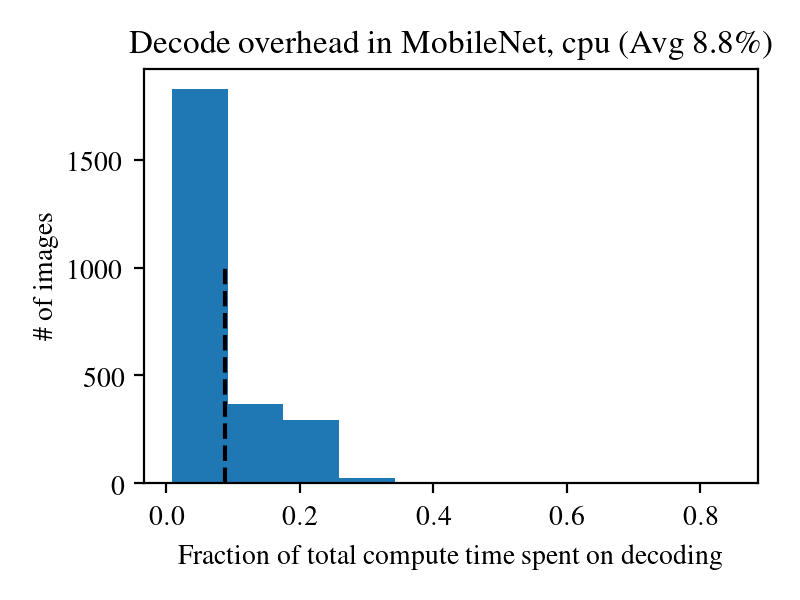

In [64]:
%matplotlib notebook

for device in ['gpu', 'cpu']:
    df = pd.read_sql(
        "select decode_ms - read_ms as true_decode_ms, total_ms - read_ms as total_compute_ms from AppExp \
            where expname=%s and device=%s order by total_compute_ms",
        db.engine,
        params=['mobilenet_inference', device])
    
    print df.count()
    
    decode_percent = df['true_decode_ms'] / df['total_compute_ms']
    
    plt.figure(figsize=(4,3))
    plt.hist(decode_percent, 10)
    plt.ylabel("\# of images")
    plt.xlabel("Fraction of total compute time spent on decoding")
    plt.title("Decode overhead in MobileNet, {} (Avg {:.1f}\%)".format(device, np.mean(decode_percent)*100))
    plt.vlines(np.mean(decode_percent), 0, 1000, linestyle='dashed')
    plt.tight_layout()
    plt.show()

In [65]:
np.mean(decode_percent)

0.08769256402629184